In [13]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

q1

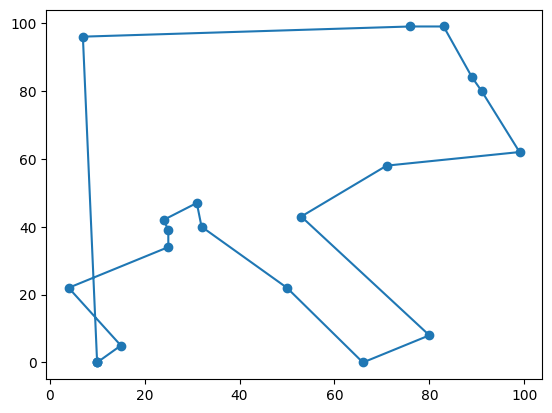

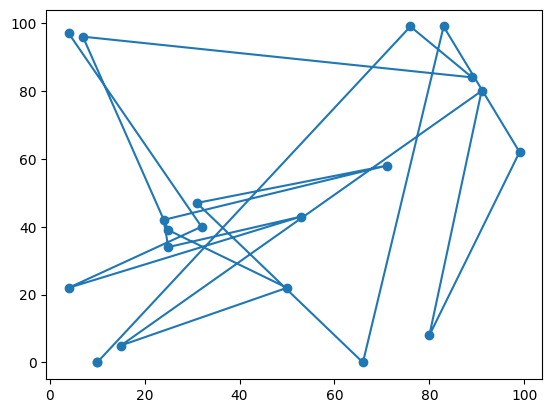

In [19]:
def cool(k):
    return 1/np.log(k+1)

def permute(x):
    n = x.shape[0]
    y = x.copy()
    idx1 = int(np.random.randint(1, n-1))
    idx2 = int(np.random.randint(1, n-1))
    while idx1 == idx2:
        idx2 = int(np.random.randint(1, n-1))
    t = y[idx1]
    y[idx1] = y[idx2]
    y[idx2] = t
    return y

def CostEuclid(route,coord):
    dist = [ np.sqrt( (coord[route[N+1] ,0] - coord[route[N] ,0])**2 + (coord[route[N+1] ,1] - coord[route[N] ,1])**2)  for N in range(len(route)-1)]
    return np.sum(dist)

def random_coordinates(X):
    C= np.random.randint(0,100+1,[len(X)-1,2]).tolist()
    C.insert(X[-1],C[X[-1]])
    return np.array(C)


x = np.array(range(20))
np.random.shuffle(x)
x = np.append(x, x[0])

positions = random_coordinates(x)
costx= CostEuclid(x, positions)
best_path = x.copy()
best_cost = CostEuclid(x, positions)

cost_list = [best_cost]
ks = 0.0001
for _ in range(100000):

    T = cool(ks)
    y = permute(x)
    costx = CostEuclid(x, positions)
    costy = CostEuclid(y, positions)
    if costy < costx:
        best_path = y.copy()
        best_cost = costy
        x = y.copy()
    
    p = np.exp(-(costy - costx)/T)
    u = np.random.uniform(0,1)
    if u < p:
        best_path = y.copy()
        best_cost = costy
        x = y.copy()

    cost_list.append(best_cost)
    ks = ks+0.0001

plt.scatter(positions[x][:,0],positions[x][:,1])
plt.plot(positions[x][:,0],positions[x][:,1])

plt.figure()
plt.scatter(positions[:,0],positions[:,1])
plt.plot(positions[:,0],positions[:,1])
plt.show()